# ANÁLISIS Y VISUALIZACIONES

In [78]:
#Importamos librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
#Importamos los DF limpios
films = pd.read_csv('../Data/clean_films.csv', index_col=0)
series = pd.read_csv('../Data/clean_series.csv', index_col=0)

In [80]:
films.head(5)

,film_id,title,original_language,genre_ids,release_date,popularity,vote_average,vote_count,id,genre,release_year,release_month
0,565770,Blue Beetle,en,28,2023-08-16,2973,7.2,956,28,Action,2023,August
1,762430,Retribution,en,28,2023-08-23,1485,6.9,236,28,Action,2023,August
2,615656,Meg 2: The Trench,en,28,2023-08-02,1323,7.0,1973,28,Action,2023,August
3,385687,Fast X,en,28,2023-05-17,1183,7.3,3867,28,Action,2023,May
4,980489,Gran Turismo,en,28,2023-08-09,977,7.8,473,28,Action,2023,August


In [81]:
series.head(5)

,serie_id,name,origin_country,popularity,vote_average,vote_count,num_episodes,episode_duration,first_air_date,genre,release_year,release_month
0,94722,Tagesschau,DE,3359,7.5,147,20839,15.0,1952-12-26,News,1952,December
1,101463,Al rojo vivo,ES,2465,3.0,15,298,200.0,2011-01-10,News,2011,January
2,2224,The Daily Show,US,1694,6.3,452,3830,26.0,1996-07-22,News,1996,July
3,1655,PBS NewsHour,US,569,5.4,42,2591,57.0,1975-10-20,News,1975,October
4,154300,Euronews Hoy,ES,566,4.8,10,647,30.0,2019-01-28,News,2019,January


## `Películas`

- #### Películas a lo largo de los años

In [82]:
#En primer lugar, vamos a centrar el estudio del análisis hasta el año 2023, no vamos a contar con las películas que se estrenen posteriormente

films = films[films['release_year'] <= 2023]

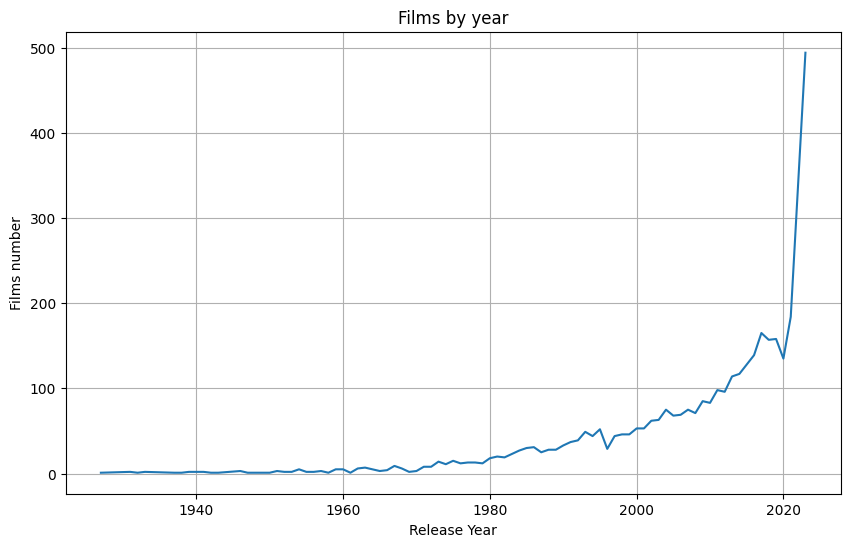

In [83]:
# Agrupamos el df por año de lanzamiento y ccontamos las películas por año
films_by_year = films.groupby('release_year')['film_id'].count()

# Creamos un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(films_by_year.index, films_by_year.values, linestyle='-')

# Etiquetas y título del gráfico
plt.xlabel('Release Year')
plt.ylabel('Films number')
plt.title('Films by year')

# Mostrar el gráfico
plt.grid(True)
plt.show()

- #### Principales idiomas originales

In [84]:
principal_languages = films.groupby('original_language')['film_id'].count().sort_values(ascending=False)[:7]
principal_languages

original_language
en    3116
ja     220
ko     137
es      88
fr      78
it      62
zh      56
Name: film_id, dtype: int64

In [85]:
# Diccionario de mapeo de idiomas
mapeo = {'en': 'English', 'ja': 'Japanese', 'ko': 'Korean', 'es': 'Spanish', 
         'fr': 'French', 'it': 'Italian', 'zh': 'Chinese'}

principal_languages.index = principal_languages.index.map(mapeo)

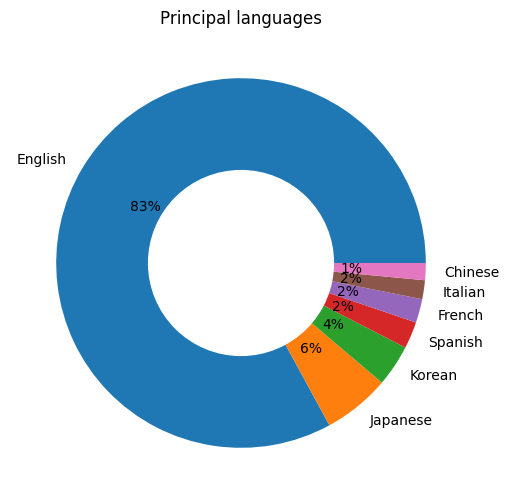

In [86]:
labels = principal_languages.index
data = principal_languages.values

# Creaamos el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(data, labels=labels,  autopct='%.0f%%')

# Añadimos un círculo
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# Título del gráfico
plt.title('Principal languages')

plt.show()

- #### Película más popular y películas con mejor valoración

In [87]:
films_sorted_by_popularity = films.sort_values(by='popularity', ascending=False)
films_sorted_by_popularity.head(1)

,film_id,title,original_language,genre_ids,release_date,popularity,vote_average,vote_count,id,genre,release_year,release_month
0,565770,Blue Beetle,en,28,2023-08-16,2973,7.2,956,28,Action,2023,August


In [88]:
films[films['vote_average'] == 10]

,film_id,title,original_language,genre_ids,release_date,popularity,vote_average,vote_count,id,genre,release_year,release_month
2769,1175107,My Otaku Girlfriend,es,18,2023-09-28,64,10.0,1,18,Drama,2023,September
2807,1032194,The Blind,en,18,2023-09-28,48,10.0,3,18,Drama,2023,September
2851,1105832,Simón,en,18,2023-04-15,40,10.0,1,18,Drama,2023,April
2890,731159,Female Boss Hooker,ko,18,2020-08-31,49,10.0,1,18,Drama,2020,August
3053,1118256,Keramat Tunggak,id,18,2023-04-21,24,10.0,1,18,Drama,2023,April
3187,1135727,Sugapa,tl,18,2023-08-25,26,10.0,1,18,Drama,2023,August
3900,1173464,Fanny Ardant - Naissance d'une passion,fr,99,2023-09-27,20,10.0,1,99,Documentary,2023,September


- #### ¿Una mayor popularidad implica una mejor valoración? 

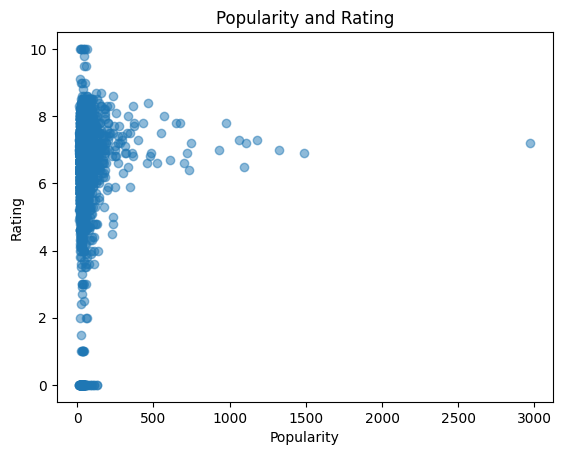

In [89]:
# Crear el gráfico de dispersión
plt.scatter(films['popularity'], films['vote_average'], alpha=0.5)  # alpha ajusta la transparencia de los puntos

# Etiquetas de los ejes y título
plt.xlabel('Popularity')
plt.ylabel('Rating')
plt.title('Popularity and Rating')

# Mostrar el gráfico
plt.show()

In [90]:
films[['popularity', 'vote_average']].corr()

,popularity,vote_average
popularity,1.000000,0.064844
vote_average,0.064844,1.000000


Aparentemente no existe una relación directa entre popularidad y valoración de los usuarios

- #### Valoraciones y popularidad de las películas en función de sus géneros

In [91]:
films_by_genre = films.groupby(by= 'genre')[['vote_average', 'popularity']].mean()

In [92]:
films_by_genre

,vote_average,popularity
genre,,
Action,6.535165,62.528846
Adventure,6.728777,45.294964
Animation,7.108403,54.459384
Comedy,6.283299,38.729897
Crime,6.791241,41.547445
Documentary,6.296875,36.968750
Drama,6.492910,36.794682
Family,6.635593,45.466102
Fantasy,6.657143,41.892857


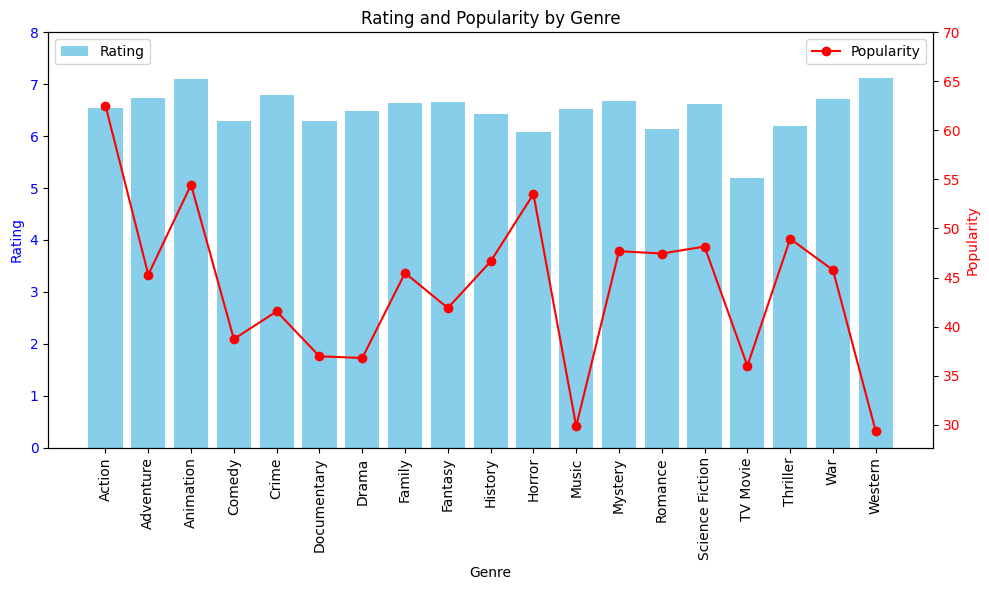

In [142]:
# Crear un gráfico de barras para la calificación promedio por género
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(films_by_genre.index, films_by_genre['vote_average'], color='skyblue', label='Rating')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Rating', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(top=8)
plt.xticks(rotation=90)

# Creamos un segundo eje
ax2 = ax1.twinx()
ax2.plot(films_by_genre.index, films_by_genre['popularity'], marker='o', linestyle='-', color='red', label='Popularity')
ax2.set_ylabel('Popularity', color='red')
ax2.set_ylim(top=70)
ax2.tick_params(axis='y', labelcolor='red')


# Título
plt.title('Rating and Popularity by Genre')

# Leyenda
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotar las etiquetas del eje x para mayor claridad

plt.tight_layout()
plt.show()


Se aprecia que en la valoración promedia de los usuarios el género de la película no tiene ninguna influencia, mientras que en el caso de la popularidad, se ven diferencias en función del género, tendiendo a ser las películas más populares las de acción, animación y horror, y las menos populares las de televisión, las del oeste y las musicales.

- #### Popularidad de las películas en función de los meses en los que sale la película

In [94]:
films_by_month = films.groupby(by= 'release_month')[['popularity']].mean()

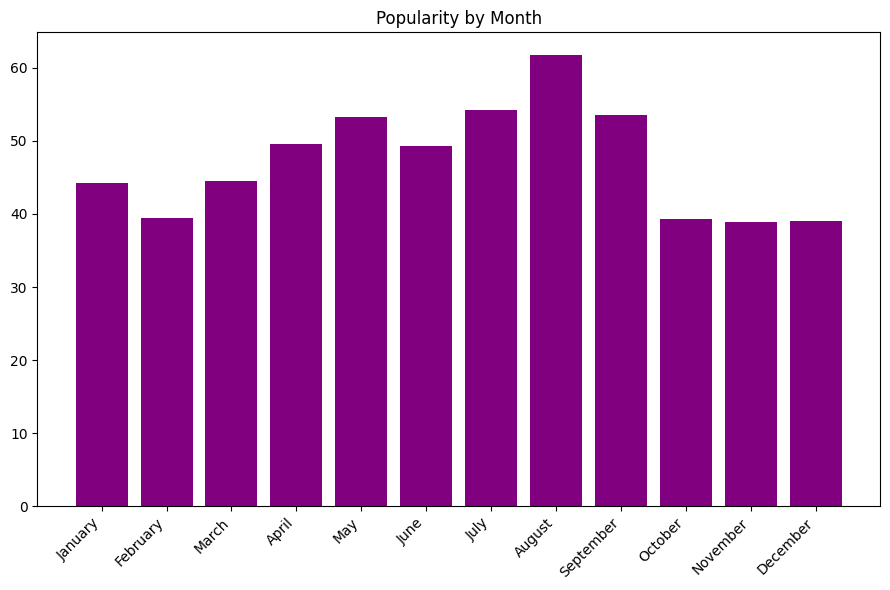

In [99]:
order = ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December']

# Ordenar el DataFrame por el orden deseado
films_by_month = films_by_month.reindex(order)

# Crear el gráfico de barras
plt.figure(figsize=(9, 6))
plt.bar(films_by_month.index, films_by_month['popularity'], label='Popularity', color='purple')
plt.title('Popularity by Month')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Las películas estrenadas durante los meses de verano son las que alcanzan más popularidad. 

## `Series`

In [100]:
series.head()

,serie_id,name,origin_country,popularity,vote_average,vote_count,num_episodes,episode_duration,first_air_date,genre,release_year,release_month
0,94722,Tagesschau,DE,3359,7.5,147,20839,15.0,1952-12-26,News,1952,December
1,101463,Al rojo vivo,ES,2465,3.0,15,298,200.0,2011-01-10,News,2011,January
2,2224,The Daily Show,US,1694,6.3,452,3830,26.0,1996-07-22,News,1996,July
3,1655,PBS NewsHour,US,569,5.4,42,2591,57.0,1975-10-20,News,1975,October
4,154300,Euronews Hoy,ES,566,4.8,10,647,30.0,2019-01-28,News,2019,January


In [101]:
series = series[series['release_year'] <= 2023]

- #### Series a lo largo de los años

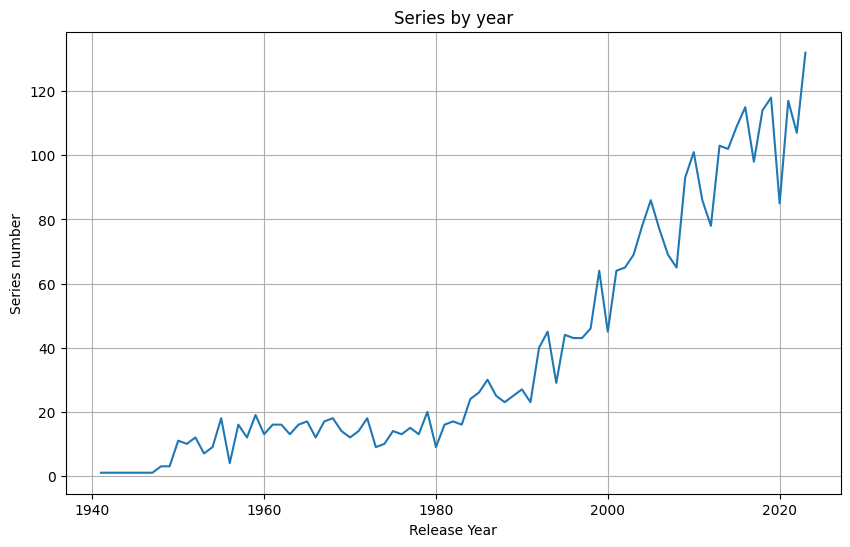

In [103]:
# Agrupamos el df por año de lanzamiento y ccontamos las películas por año
series_by_year = series.groupby('release_year')['serie_id'].count()

# Creamos un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(series_by_year.index, series_by_year.values, linestyle='-')
plt.xlabel('Release Year')
plt.ylabel('Series number')
plt.title('Series by year')

# Mostrar el gráfico
plt.grid(True)
plt.show()

- #### Principales países de origen

In [108]:
principal_country = series.groupby('origin_country')['serie_id'].count().sort_values(ascending=False)[:7]
principal_country

origin_country
US    1586
JP     341
GB     228
CA     145
MX     122
DE      88
FR      73
Name: serie_id, dtype: int64

In [109]:
# Diccionario de mapeo 
mapeo = {'US': 'USA', 'JP': 'Japan', 'GB': 'UK', 'CA': 'Canada', 
         'MX': 'Mexico', 'DE': 'Germany', 'FR': 'France'}

principal_country.index = principal_country.index.map(mapeo)

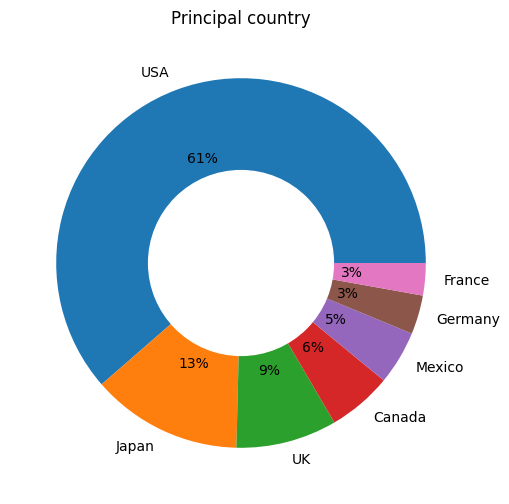

In [110]:
labels = principal_country.index
data = principal_country.values

# Creaamos el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(data, labels=labels,  autopct='%.0f%%')

# Añadimos un círculo
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# Título del gráfico
plt.title('Principal country')

plt.show()

- #### Serie más popular y mas valorada

In [112]:
popular_serie = series.sort_values(by='popularity', ascending= False)
popular_serie.head(1)

,serie_id,name,origin_country,popularity,vote_average,vote_count,num_episodes,episode_duration,first_air_date,genre,release_year,release_month
169,63770,The Late Show with Stephen Colbert,US,3507,6.5,205,1419,41.0,2015-09-08,Comedy,2015,September


In [113]:
series[series['vote_average'] == 10]

,serie_id,name,origin_country,popularity,vote_average,vote_count,num_episodes,episode_duration,first_air_date,genre,release_year,release_month
22,115992,The Damage Report with John Iadarola,US,108,10.0,1,814,61.0,2018-11-28,News,2018,November
43,132544,Great Minds,KR,1625,10.0,1,454,20.0,2021-08-30,Talk,2021,August
215,234291,Daddy's Daughters. New,RU,278,10.0,1,20,24.0,2023-09-18,Comedy,2023,September
229,64770,Potato Star 2013QR3,KR,107,10.0,1,120,35.0,2013-09-23,Comedy,2013,September
609,2341,For Your Love,US,59,10.0,1,87,26.0,1998-03-17,Comedy,1998,March
1244,49933,You'll Never Know,TR,34,10.0,3,9,120.0,2023-07-24,Drama,2023,July
1276,221416,Kiseki: Dear to Me,TW,40,10.0,2,13,25.0,2023-08-22,Drama,2023,August
1434,223213,Live Your Own Life,KR,52,10.0,1,50,80.0,2023-09-16,Family,2023,September
1496,228980,Her Fall Doesn't Cry,TR,53,10.0,2,17,120.0,2023-06-22,Family,2023,June
1597,70329,The Voice France,FR,43,10.0,1,197,115.0,2012-02-25,Reality,2012,February


- #### Relación entre popularidad y valoración en series

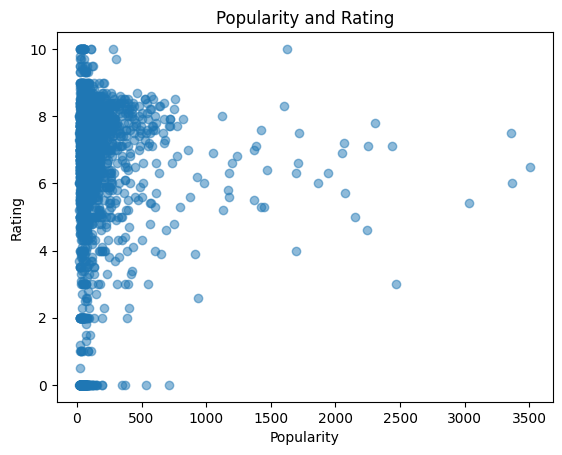

In [114]:
# Crear el gráfico de dispersión
plt.scatter(series['popularity'], series['vote_average'], alpha=0.5)  # alpha ajusta la transparencia de los puntos

# Etiquetas de los ejes y título
plt.xlabel('Popularity')
plt.ylabel('Rating')
plt.title('Popularity and Rating')

# Mostrar el gráfico
plt.show()

In [115]:
series[['popularity', 'vote_average']].corr()

,popularity,vote_average
popularity,1.00000,0.01008
vote_average,0.01008,1.00000


Observamos que en las series tampoco existe una correlación entre popularidad y mayores valoraciones de los usuarios

- #### Popularidad y valoración por género de serie

In [143]:
series_by_genre = series.groupby(by='genre')[['vote_average', 'popularity']].mean()

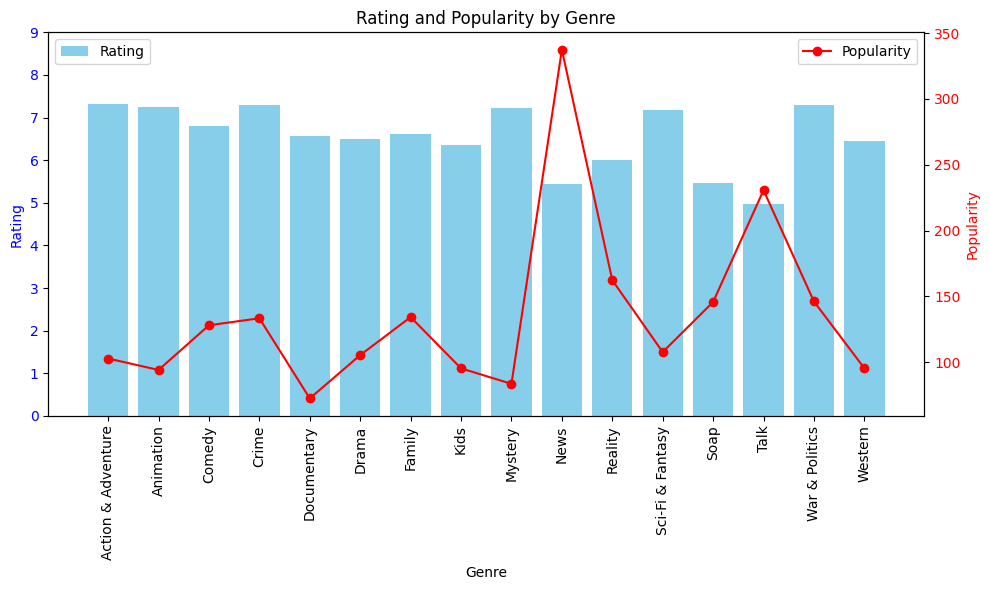

In [146]:
# Crear un gráfico de barras para la calificación promedio por género
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(series_by_genre.index, series_by_genre['vote_average'], color='skyblue', label='Rating')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Rating', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(top=9)
plt.xticks(rotation=90)
# Creamos un segundo eje
ax2 = ax1.twinx()
ax2.plot(series_by_genre.index, series_by_genre['popularity'], marker='o', linestyle='-', color='red', label='Popularity')
ax2.set_ylabel('Popularity', color='red')
ax2.tick_params(axis='y', labelcolor='red')


# Título
plt.title('Rating and Popularity by Genre')

# Leyenda
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotar las etiquetas del eje x para mayor claridad

plt.tight_layout()
plt.show()

- #### Popularidad por meses

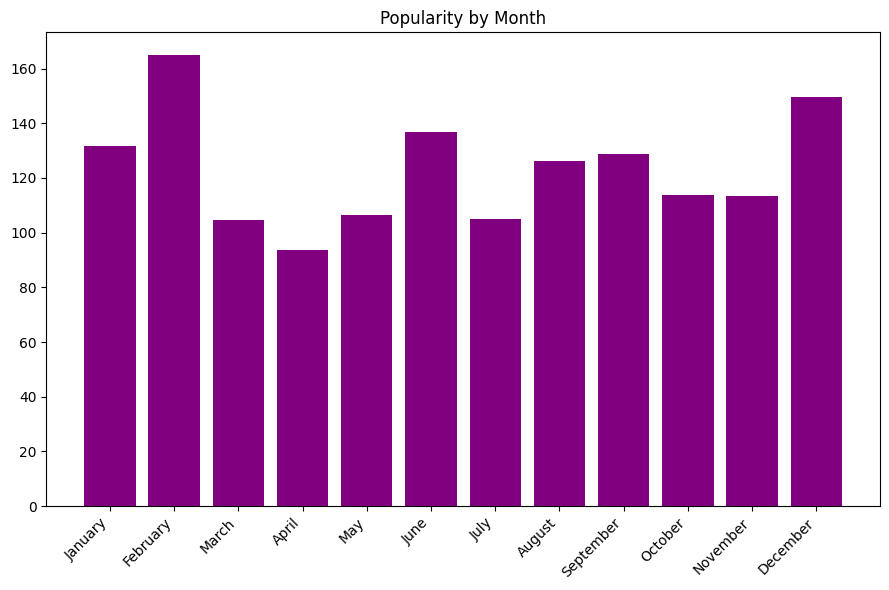

In [118]:
series_by_month = series.groupby(by='release_month')[['popularity']].mean()

order = ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December']

# Ordenar el DataFrame por el orden deseado
series_by_month = series_by_month.reindex(order)

# Crear el gráfico de barras
plt.figure(figsize=(9, 6))
plt.bar(series_by_month.index, series_by_month['popularity'], label='Popularity', color='purple')
plt.title('Popularity by Month')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

- #### ¿Influye la duración en el exito?